# The New Science of Hitting
FiveThirtyEight's [The New Science of Hitting](https://fivethirtyeight.com/features/the-new-science-of-hitting/) serves as a nice primer on how Statcast data is giving us a new glimpse into the game's inner workings. This notebook will serve as an example of how to re-create their analysis and work with Statcast data. 

In [1]:
#imports
from pybaseball import statcast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### First, collect two months worth of pitch-level data from Statcast

In [2]:
# collect Statcast data on all pitches from the months of May and June
data = statcast('2017-05-01', '2017-06-30')
print(data.shape)

This is a large query, it may take a moment to complete
Completed sub-query from 2017-05-01 to 2017-05-06
Completed sub-query from 2017-05-07 to 2017-05-12
Completed sub-query from 2017-05-13 to 2017-05-18
Completed sub-query from 2017-05-19 to 2017-05-24
Completed sub-query from 2017-05-25 to 2017-05-30
Completed sub-query from 2017-05-31 to 2017-06-05
Completed sub-query from 2017-06-06 to 2017-06-11
Completed sub-query from 2017-06-12 to 2017-06-17
Completed sub-query from 2017-06-18 to 2017-06-23
Completed sub-query from 2017-06-24 to 2017-06-29
Completed sub-query from 2017-06-30 to 2017-06-30
(247710, 90)


### Not every pitch results in contact with the ball, so let's drop all observations where the metrics we care about have NaNs for their value.

In [3]:
data2 = data.dropna(subset=['launch_angle', 'launch_speed', 'estimated_ba_using_speedangle'])

In [4]:
data2.shape

(43835, 90)

### Now for the fun part: plot a batted ball's probability of becoming a hit as a function of its launch angle and exit velocity.

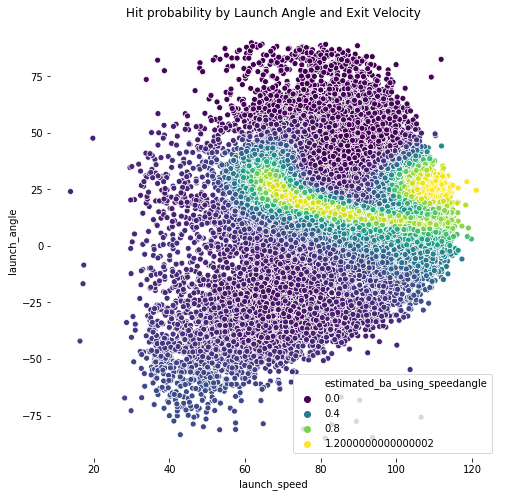

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.despine(fig, left=True, bottom=True)
sns.scatterplot(x="launch_speed", y="launch_angle",
                hue="estimated_ba_using_speedangle", 
                palette='viridis', 
                data=data2, ax=ax)
ax.set_title("Hit probability by Launch Angle and Exit Velocity");

As you can see, the "sweet spot" where these two metrics are just right for producing a hit is not a simple blob on the graph as one might expect! In fact, there seem to be two distinct patterns happening here. Let's take a look at this same chart for home runs only and see if those are responsible for the differing patterns.

In [6]:
data2['hr'] = data2.events=='home_run'

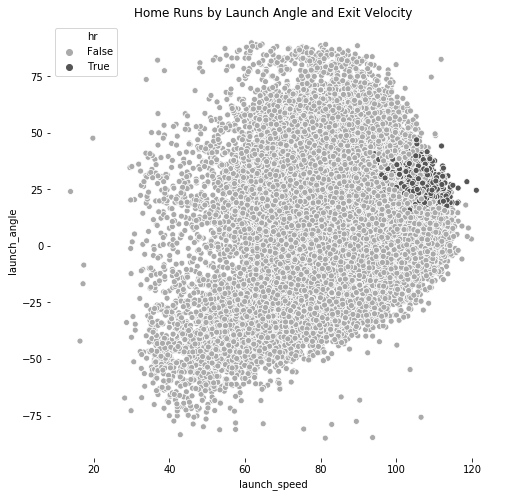

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.despine(fig, left=True, bottom=True)
sns.scatterplot(x="launch_speed", y="launch_angle",
                hue="hr", 
                palette='binary', 
                data=data2, ax=ax)
ax.set_title("Home Runs by Launch Angle and Exit Velocity");

So there you have it. From the two patterns observed when plotting hit probability against exit velocity and launch angle, the round cluster around 115mph speed and 30 degrees launch angle represents mostly home runs, while the other pattern observed is within-the-park hits. 

### Another question we can ask: is it always better to hit the ball harder?
Here we will look at a few metrics, but most importantly expected wOBA (weighted on base average), as they vary by hit speed. First, let's break hit speed into five evenly spaced bins and see how a few variables look when broken down by exit velocity. 

In [8]:
data2.groupby(pd.cut(data2.launch_speed, 6)).mean()

,index,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,...,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,hr
launch_speed,,,,,,,,,,,,,,,,,,,,,
"(13.793, 31.767]",11060.428571,87.933333,-1.071667,5.817324,531710.142857,519580.000000,NaN,NaN,NaN,NaN,...,3.047619,1.761905,3.476190,2.523810,2.714286,3.476190,1.761905,2.523810,2.714286,0.000000
"(31.767, 49.633]",12340.564863,88.054195,-0.854231,5.881935,534967.035582,530828.465530,NaN,NaN,NaN,NaN,...,2.666420,2.040771,2.275019,2.205337,2.110452,2.275019,2.040771,2.205337,2.110452,0.000000
"(49.633, 67.5]",12000.102696,88.058248,-0.863501,5.867845,525691.765725,527738.158216,NaN,NaN,NaN,NaN,...,3.503209,2.348845,2.522465,2.423941,2.447368,2.522465,2.348845,2.423941,2.447368,0.000000
"(67.5, 85.367]",11936.809463,88.280047,-0.905406,5.876606,526738.735593,529989.743150,NaN,NaN,NaN,NaN,...,3.440678,2.388347,2.534110,2.441525,2.480932,2.534110,2.388347,2.441525,2.480932,0.000000
"(85.367, 103.233]",12023.585358,88.972077,-0.968944,5.889224,524436.133473,531391.800938,NaN,NaN,NaN,NaN,...,3.441181,2.366404,2.532965,2.442696,2.456674,2.532965,2.366404,2.442696,2.456674,0.051855
"(103.233, 121.1]",12074.970178,89.738883,-0.928071,5.905083,528884.619289,532576.541878,NaN,NaN,NaN,NaN,...,3.374788,2.316836,2.484349,2.415821,2.385364,2.484349,2.316836,2.415821,2.385364,0.232657


There are definitely some patterns there. To take a closer look at the metric of interest, let's use a few more bins and graph the expected weighted on base average value of a hit against its exit velocity. This should give a rough answer as to whether it's always better to hit the ball harder. 

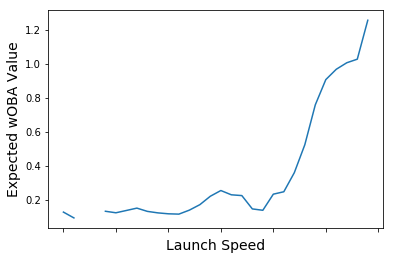

In [9]:
groups = data2.groupby(pd.cut(data2.launch_speed, 30))
ax = groups['estimated_woba_using_speedangle'].mean().plot()
ax.set_xlabel('Launch Speed', fontsize=14)
ax.set_ylabel('Expected wOBA Value', fontsize=14);

So, while it's usually better to hit the ball harder, there is a slight downward "dip" in the graph. This most likely represents the fly ball zone, where the ball has been hit hard enogh to get past the infield and gain some air, but not hard enough to make it past the fences. 

In general, however, this confirms the trend we would expect. Harder-hit balls tend to give batters more bases. 